# **Tugas Besar Tahap 2: Klasifikasi**
**Nama Kelompok:**  
**1. Rizky Yudha Pratama (1301181324)**  
**2. Aditya Mahendra Z (1301184388)**  
**Kelas: IF-42-12**  

# **Exploratory**

In [1]:
# Import library yang dibutuhkan
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import tree

In [2]:
# Read file csv
df_test = pd.read_csv('kendaraan_test.csv')
df_train = pd.read_csv('kendaraan_train.csv')

In [3]:
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [4]:
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [5]:
# Menggabungkan dataframe testing dan training
dataframe = pd.concat([df_test,df_train]).drop_duplicates().reset_index(drop=True)
dataframe

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,id
0,Wanita,49.0,1.0,8.0,0.0,1-2 Tahun,Pernah,46963.0,26.0,145.0,0,NaN
1,Pria,22.0,1.0,47.0,1.0,< 1 Tahun,Tidak,39624.0,152.0,241.0,0,NaN
2,Pria,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,110479.0,152.0,62.0,0,NaN
3,Pria,46.0,1.0,8.0,1.0,1-2 Tahun,Tidak,36266.0,124.0,34.0,0,NaN
4,Pria,35.0,1.0,23.0,0.0,1-2 Tahun,Pernah,26963.0,152.0,229.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
333462,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0,285827.0
333463,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0,285828.0
333464,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0,285829.0
333465,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0,285830.0


# **Preprocessing**

In [6]:
# Drop kolom id pada data train
dataframe.drop(dataframe.columns[11], axis=1, inplace=True)
dataframe

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49.0,1.0,8.0,0.0,1-2 Tahun,Pernah,46963.0,26.0,145.0,0
1,Pria,22.0,1.0,47.0,1.0,< 1 Tahun,Tidak,39624.0,152.0,241.0,0
2,Pria,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,110479.0,152.0,62.0,0
3,Pria,46.0,1.0,8.0,1.0,1-2 Tahun,Tidak,36266.0,124.0,34.0,0
4,Pria,35.0,1.0,23.0,0.0,1-2 Tahun,Pernah,26963.0,152.0,229.0,0
...,...,...,...,...,...,...,...,...,...,...,...
333462,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
333463,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
333464,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
333465,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [7]:
# Membuang data yang missing value / NaN
dataframe.dropna(inplace=True)
dataframe

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49.0,1.0,8.0,0.0,1-2 Tahun,Pernah,46963.0,26.0,145.0,0
1,Pria,22.0,1.0,47.0,1.0,< 1 Tahun,Tidak,39624.0,152.0,241.0,0
2,Pria,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,110479.0,152.0,62.0,0
3,Pria,46.0,1.0,8.0,1.0,1-2 Tahun,Tidak,36266.0,124.0,34.0,0
4,Pria,35.0,1.0,23.0,0.0,1-2 Tahun,Pernah,26963.0,152.0,229.0,0
...,...,...,...,...,...,...,...,...,...,...,...
333462,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
333463,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
333464,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
333465,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [8]:
dataframe.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [9]:
# Mengubah tipe data kategorikal menjadi numerikal
dataframe = dataframe.apply(lambda series: pd.Series(LabelEncoder().fit_transform(series[series.notnull()]),index=series[series.notnull()].index))
dataframe

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,29,1,8,0,0,0,28578,23,135,0
1,0,2,1,47,1,1,1,21542,138,231,0
2,0,4,1,28,1,1,1,42416,138,52,0
3,0,26,1,8,1,0,1,18201,115,24,0
4,0,15,1,23,0,0,0,8903,138,219,0
...,...,...,...,...,...,...,...,...,...,...,...
333462,1,3,1,4,1,1,1,7929,138,207,0
333463,1,1,1,46,1,1,1,26477,138,40,0
333464,1,3,1,50,1,1,1,30960,138,216,0
333465,0,48,1,7,1,0,1,12442,115,260,0


In [10]:
dataframe.dtypes

Jenis_Kelamin        int64
Umur                 int64
SIM                  int64
Kode_Daerah          int64
Sudah_Asuransi       int64
Umur_Kendaraan       int64
Kendaraan_Rusak      int64
Premi                int64
Kanal_Penjualan      int64
Lama_Berlangganan    int64
Tertarik             int64
dtype: object

**Scalling**

In [11]:
# Normalisasi dataframe dengan MinMax range [0,1]
new_dataframe = dataframe.copy()
new_dataframe = (dataframe - dataframe.min(axis=0)) / (dataframe.max(axis=0) - dataframe.min(axis=0))
new_dataframe

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,0.446154,1.0,0.153846,0.0,0.0,0.0,0.670153,0.156463,0.467128,0.0
1,0.0,0.030769,1.0,0.903846,1.0,0.5,1.0,0.505159,0.938776,0.799308,0.0
2,0.0,0.061538,1.0,0.538462,1.0,0.5,1.0,0.994653,0.938776,0.179931,0.0
3,0.0,0.400000,1.0,0.153846,1.0,0.0,1.0,0.426813,0.782313,0.083045,0.0
4,0.0,0.230769,1.0,0.442308,0.0,0.0,0.0,0.208775,0.938776,0.757785,0.0
...,...,...,...,...,...,...,...,...,...,...,...
333462,1.0,0.046154,1.0,0.076923,1.0,0.5,1.0,0.185935,0.938776,0.716263,0.0
333463,1.0,0.015385,1.0,0.884615,1.0,0.5,1.0,0.620885,0.938776,0.138408,0.0
333464,1.0,0.046154,1.0,0.961538,1.0,0.5,1.0,0.726011,0.938776,0.747405,0.0
333465,0.0,0.738462,1.0,0.134615,1.0,0.0,1.0,0.291764,0.782313,0.899654,0.0


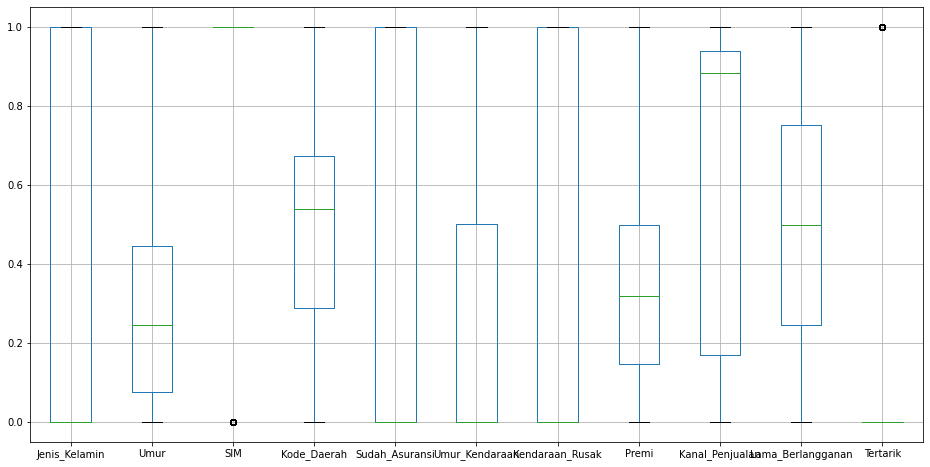

In [12]:
Plot_dataframe = new_dataframe.boxplot(figsize=(16,8))

In [13]:
# Split dataframe menjadi train dan test 80:20
df = new_dataframe
train_size = (int(len(df) * 0.80))
df = df.sample(frac=1, random_state=200).reset_index(drop=True)

#Data training
df_train = df[0:train_size]

#Data test
df_test = df[train_size:len(df)]

print("Jumlah data train: ", len(df_train))
print("Jumlah data test: ", len(df_test))

Jumlah data train:  174963
Jumlah data test:  43741


In [14]:
df_train['Tertarik'].value_counts()

0.0    153606
1.0     21357
Name: Tertarik, dtype: int64

In [15]:
df_test['Tertarik'].value_counts()

0.0    38440
1.0     5301
Name: Tertarik, dtype: int64

# **Data Preparation**

**X = Feature, Y = Class Target**

In [16]:
# Data Train
x_train = df_train.drop(['Tertarik'], axis=1)
y_train = df_train['Tertarik'].values

In [17]:
x_train = x_train.values

In [18]:
#Data test

x_test = df_test.drop(['Tertarik'], axis=1)
y_test = df_test['Tertarik'].values

In [19]:
x_test = x_test.values

# **Classification & Evaluation**

**Classification w/ Naive Bayes Method**

In [20]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
y_pred_nb = nb.predict(x_test)

**Evaluation w/ Naive Bayes Method**

In [22]:
def confusion_metrics (y_test,y_pred):
    # Untuk menentukan True Positive, False Positive, True Negative dan False Negative
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, 
                         columns = ['Predicted Negative', 'Predicted Positive'], 
                         index = ['Actual Negative', 'Actual Positive'])

    # Memasukkan nilai True Positive, False Positive, True Negative dan False Negative ke variable
    TN = cm_df.loc['Actual Negative','Predicted Negative']
    FN = cm_df.loc['Actual Positive','Predicted Negative']
    FP = cm_df.loc['Actual Negative','Predicted Positive']
    TP = cm_df.loc['Actual Positive','Predicted Positive']

    # Menampilkan jumlah masing-masing True Positive, False Positive, True Negative dan False Negative
    print('True Negative  : ',TN)
    print('False Negative : ',FN)
    print('False Positive : ',FP)
    print('True Positive  : ',TP)
    print('')

    # Menampilkan hasil perhitungan Precision, Recall dan F1-Score
    print(classification_report(y_test,y_pred))

In [23]:
confusion_metrics(y_test, y_pred_nb)

True Negative  :  22793
False Negative :  136
False Positive :  15647
True Positive  :  5165

              precision    recall  f1-score   support

         0.0       0.99      0.59      0.74     38440
         1.0       0.25      0.97      0.40      5301

    accuracy                           0.64     43741
   macro avg       0.62      0.78      0.57     43741
weighted avg       0.90      0.64      0.70     43741



In [24]:
data_test_nb = df_test.copy()
data_test_nb['Prediksi'] = y_pred_nb

In [25]:
data_test_nb

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Prediksi
174963,0.0,0.123077,1.0,0.211538,1.0,0.5,1.0,0.158217,0.938776,0.221453,0.0,0.0
174964,0.0,0.692308,1.0,0.576923,1.0,0.0,1.0,0.131296,0.156463,0.442907,0.0,0.0
174965,1.0,0.446154,1.0,0.442308,0.0,0.0,0.0,0.125832,0.972789,0.214533,0.0,1.0
174966,1.0,0.153846,1.0,0.288462,1.0,0.5,1.0,0.013413,0.938776,0.692042,0.0,0.0
174967,1.0,0.046154,1.0,0.865385,1.0,0.5,1.0,0.272981,0.938776,0.844291,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
218699,0.0,0.446154,1.0,0.538462,0.0,0.0,0.0,0.591807,0.156463,0.190311,1.0,1.0
218700,0.0,0.076923,1.0,0.153846,1.0,0.5,1.0,0.484453,0.938776,0.833910,0.0,0.0
218701,1.0,0.707692,1.0,0.538462,1.0,0.0,1.0,0.496271,0.782313,0.280277,0.0,0.0
218702,0.0,0.707692,1.0,0.884615,0.0,0.0,0.0,0.837773,0.952381,0.685121,0.0,1.0


**Classification w/ Decision Tree Method**

In [26]:
dtree =  tree.DecisionTreeClassifier(class_weight = 'balanced', min_samples_leaf = 15, random_state = 32)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

In [27]:
y_pred_dtree = dtree.predict(x_test)

**Evaluation w/ Decision Tree Method**

In [28]:
def confusion_metrics (y_test,y_pred):
    # Untuk menentukan True Positive, False Positive, True Negative dan False Negative
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, 
                         columns = ['Predicted Negative', 'Predicted Positive'], 
                         index = ['Actual Negative', 'Actual Positive'])

    # Memasukkan nilai True Positive, False Positive, True Negative dan False Negative ke variable
    TN = cm_df.loc['Actual Negative','Predicted Negative']
    FN = cm_df.loc['Actual Positive','Predicted Negative']
    FP = cm_df.loc['Actual Negative','Predicted Positive']
    TP = cm_df.loc['Actual Positive','Predicted Positive']

    # Menampilkan jumlah masing-masing True Positive, False Positive, True Negative dan False Negative
    print('True Negative  : ',TN)
    print('False Negative : ',FN)
    print('False Positive : ',FP)
    print('True Positive  : ',TP)
    print('')
    
    # Menampilkan hasil perhitungan Precision, Recall dan F1-Score
    print(classification_report(y_test,y_pred))

In [29]:
confusion_metrics(y_test, y_pred_dtree)

True Negative  :  28184
False Negative :  1384
False Positive :  10256
True Positive  :  3917

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.83     38440
         1.0       0.28      0.74      0.40      5301

    accuracy                           0.73     43741
   macro avg       0.61      0.74      0.62     43741
weighted avg       0.87      0.73      0.78     43741



In [30]:
data_test_dtree = df_test.copy()
data_test_dtree['Prediksi'] = y_pred_dtree

In [31]:
data_test_dtree

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Prediksi
174963,0.0,0.123077,1.0,0.211538,1.0,0.5,1.0,0.158217,0.938776,0.221453,0.0,0.0
174964,0.0,0.692308,1.0,0.576923,1.0,0.0,1.0,0.131296,0.156463,0.442907,0.0,0.0
174965,1.0,0.446154,1.0,0.442308,0.0,0.0,0.0,0.125832,0.972789,0.214533,0.0,1.0
174966,1.0,0.153846,1.0,0.288462,1.0,0.5,1.0,0.013413,0.938776,0.692042,0.0,0.0
174967,1.0,0.046154,1.0,0.865385,1.0,0.5,1.0,0.272981,0.938776,0.844291,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
218699,0.0,0.446154,1.0,0.538462,0.0,0.0,0.0,0.591807,0.156463,0.190311,1.0,1.0
218700,0.0,0.076923,1.0,0.153846,1.0,0.5,1.0,0.484453,0.938776,0.833910,0.0,0.0
218701,1.0,0.707692,1.0,0.538462,1.0,0.0,1.0,0.496271,0.782313,0.280277,0.0,0.0
218702,0.0,0.707692,1.0,0.884615,0.0,0.0,0.0,0.837773,0.952381,0.685121,0.0,1.0
